In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d alessiocorrado99/animals10

 99% 582M/586M [00:03<00:00, 155MB/s]
100% 586M/586M [00:03<00:00, 188MB/s]


In [ ]:
!unzip /content/animals10.zip

In [89]:
from PIL import Image
import numpy as np
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/raw-img', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 26179 files [00:04, 5525.54 files/s]


In [5]:
TRAIN_DIR = "/content/output/train"
VAL_DIR = "/content/output/val"
TEST_DIR = "/content/output/test"

configuring xception model

In [72]:
pre_trained_model = Xception(include_top=False,
                                weights='imagenet',
                                input_shape=(150, 150, 3)
                                )

83683744/83683744 [==============================] - 1s 0us/step


In [73]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [75]:
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='sigmoid')(x)


model = Model(pre_trained_model.input, x)


model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [77]:
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical")

valid_generator = train_datagen.flow_from_directory(
    directory=VAL_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical")

Found 20938 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


In [79]:
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=100,
                    verbose=2,
                    validation_data=valid_generator)

Epoch 1/20
100/100 - 67s - loss: 1.3494 - acc: 0.7188 - val_loss: 0.9548 - val_acc: 0.7533 - 67s/epoch - 669ms/step
Epoch 2/20
100/100 - 60s - loss: 1.1161 - acc: 0.7422 - val_loss: 0.9439 - val_acc: 0.7728 - 60s/epoch - 600ms/step
Epoch 3/20
100/100 - 60s - loss: 0.9250 - acc: 0.7664 - val_loss: 1.0473 - val_acc: 0.7598 - 60s/epoch - 598ms/step
Epoch 4/20
100/100 - 59s - loss: 0.8177 - acc: 0.7937 - val_loss: 0.7530 - val_acc: 0.7823 - 59s/epoch - 591ms/step
Epoch 5/20
100/100 - 61s - loss: 0.8710 - acc: 0.7781 - val_loss: 0.9295 - val_acc: 0.7827 - 61s/epoch - 606ms/step
Epoch 6/20
100/100 - 60s - loss: 0.7743 - acc: 0.7939 - val_loss: 0.7759 - val_acc: 0.8018 - 60s/epoch - 599ms/step
Epoch 7/20
100/100 - 59s - loss: 0.7854 - acc: 0.7873 - val_loss: 0.8840 - val_acc: 0.8003 - 59s/epoch - 589ms/step
Epoch 8/20
100/100 - 60s - loss: 0.6881 - acc: 0.8131 - val_loss: 0.6263 - val_acc: 0.8294 - 60s/epoch - 604ms/step
Epoch 9/20
100/100 - 59s - loss: 0.7072 - acc: 0.8194 - val_loss: 0.6871

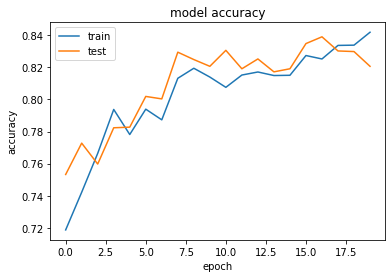

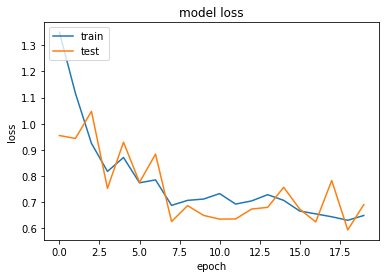

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
results = {0: 'dog',
           1: 'horse',
           2: 'elephant',
           3: 'butterfly',
           4: 'chicken',
           5: 'cat',
           6: 'cow',
           7: 'sheep',
           8: 'spider',
           9: 'squirrel'}

In [88]:
im=Image.open("/content/output/test/scoiattolo/OIP-2qGc6MkDYXePcg3fviwc7QHaEO.jpeg")
im=im.resize((150,150))
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict([im])[0]
print(results[np.argmax(pred)])

1/1 [==============================] - 0s 20ms/step
squirrel


In [92]:
def predict_image(image_path):
  im=Image.open(image_path)
  im=im.resize((150,150))
  im=np.expand_dims(im,axis=0)
  im=np.array(im)
  im=im/255
  pred=model.predict([im])[0]
  return results[np.argmax(pred)]

In [93]:
predict_image('/content/output/test/pecora/OIP-1DmKK0drohhyY2Ssem6AuQHaGJ.jpeg')

1/1 [==============================] - 0s 20ms/step


'sheep'